<h1>Air Quality Classification

This  machine learninig project classifies the air quality of an area by learning from various parameters that affects air quality. <br>
The features of the dataset are:
<ol>
<li><b><Temperature> (°C):</b> Average temperature of the region.
<li><b> Humidity (%):</b> Relative humidity recorded in the region.
<li><b>PM2.5 Concentration (µg/m³):</b> Fine particulate matter levels.
<li><b>PM10 Concentration (µg/m³):</b> Coarse particulate matter levels.
<li><b>NO2 Concentration (ppb):</b> Nitrogen dioxide levels.
<li><b>SO2 Concentration (ppb):</b> Sulfur dioxide levels.
<li><b>CO Concentration (ppm):</b> Carbon monoxide levels.
<li><b>Proximity to Industrial Areas (km):</b> Distance to the nearest industrial zone.
<li><b>Population Density (people/km²):</b> Number of people per square kilometer in the region.
</ol>
The target variable is 'Air Quality Levels' with the following values:
<ol>
<li><b>Good:</b> Clean air with low pollution levels.
<li><b>Moderate:</b> Acceptable air quality but with some pollutants present.
<li><b>Poor:</b> Noticeable pollution that may cause health issues for sensitive groups.
<li><b>Hazardous:</b> Highly polluted air posing serious health risks to the population.


In this project, 5 popular Classification Algorithms are taken <i> (Decision Tree, Random Forest, SVM, Naive Bayesian and KNN) </i> and are trained with the data. And their accuracy scores and other error metrics are calculated and visualized. Then, the algorithm with the best performance is chosen for the final model build.

<i> Necessary imports </i>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

Reading the dataset and printing the head and tail

In [2]:
df=pd.read_csv('updated_pollution_dataset.csv')
print(df.head().to_string())
print(df.tail().to_string())

   Temperature  Humidity  PM2.5  PM10   NO2   SO2    CO  Proximity_to_Industrial_Areas  Population_Density Air Quality
0         29.8      59.1    5.2  17.9  18.9   9.2  1.72                            6.3                 319    Moderate
1         28.3      75.6    2.3  12.2  30.8   9.7  1.64                            6.0                 611    Moderate
2         23.1      74.7   26.7  33.8  24.4  12.6  1.63                            5.2                 619    Moderate
3         27.1      39.1    6.1   6.3  13.5   5.3  1.15                           11.1                 551        Good
4         26.5      70.7    6.9  16.0  21.9   5.6  1.01                           12.7                 303        Good
      Temperature  Humidity  PM2.5   PM10   NO2   SO2    CO  Proximity_to_Industrial_Areas  Population_Density Air Quality
4995         40.6      74.1  116.0  126.7  45.5  25.7  2.11                            2.8                 765   Hazardous
4996         28.1      96.9    6.9   25.

Now we do some EDA on this dataset for better understanding the dataset.

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None


Here we can observe that the dataset has 5000 entries and there are no null values.

In [4]:
print(df.describe().to_string())

       Temperature     Humidity        PM2.5         PM10          NO2          SO2           CO  Proximity_to_Industrial_Areas  Population_Density
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000                    5000.000000         5000.000000
mean     30.029020    70.056120    20.142140    30.218360    26.412100    10.014820     1.500354                       8.425400          497.423800
std       6.720661    15.863577    24.554546    27.349199     8.895356     6.750303     0.546027                       3.610944          152.754084
min      13.400000    36.000000     0.000000    -0.200000     7.400000    -6.200000     0.650000                       2.500000          188.000000
25%      25.100000    58.300000     4.600000    12.300000    20.100000     5.100000     1.030000                       5.400000          381.000000
50%      29.000000    69.800000    12.000000    21.700000    25.300000     8.000000     1.410000                

We can observe that there are some entries with negative values. These are error entries, so these entries are dropped.

In [5]:
print(df.shape)
invalid_data_cols=['PM10','SO2']
rows_to_drop=df[(df[invalid_data_cols]<0).any(axis=1)]
print(len(rows_to_drop)) # Count of dropped records
df_clean=df[(df[invalid_data_cols]>=0).all(axis=1)]
df=df_clean
print(df.shape)

(5000, 10)
31
(4969, 10)


Now we check for outliers in each columns.

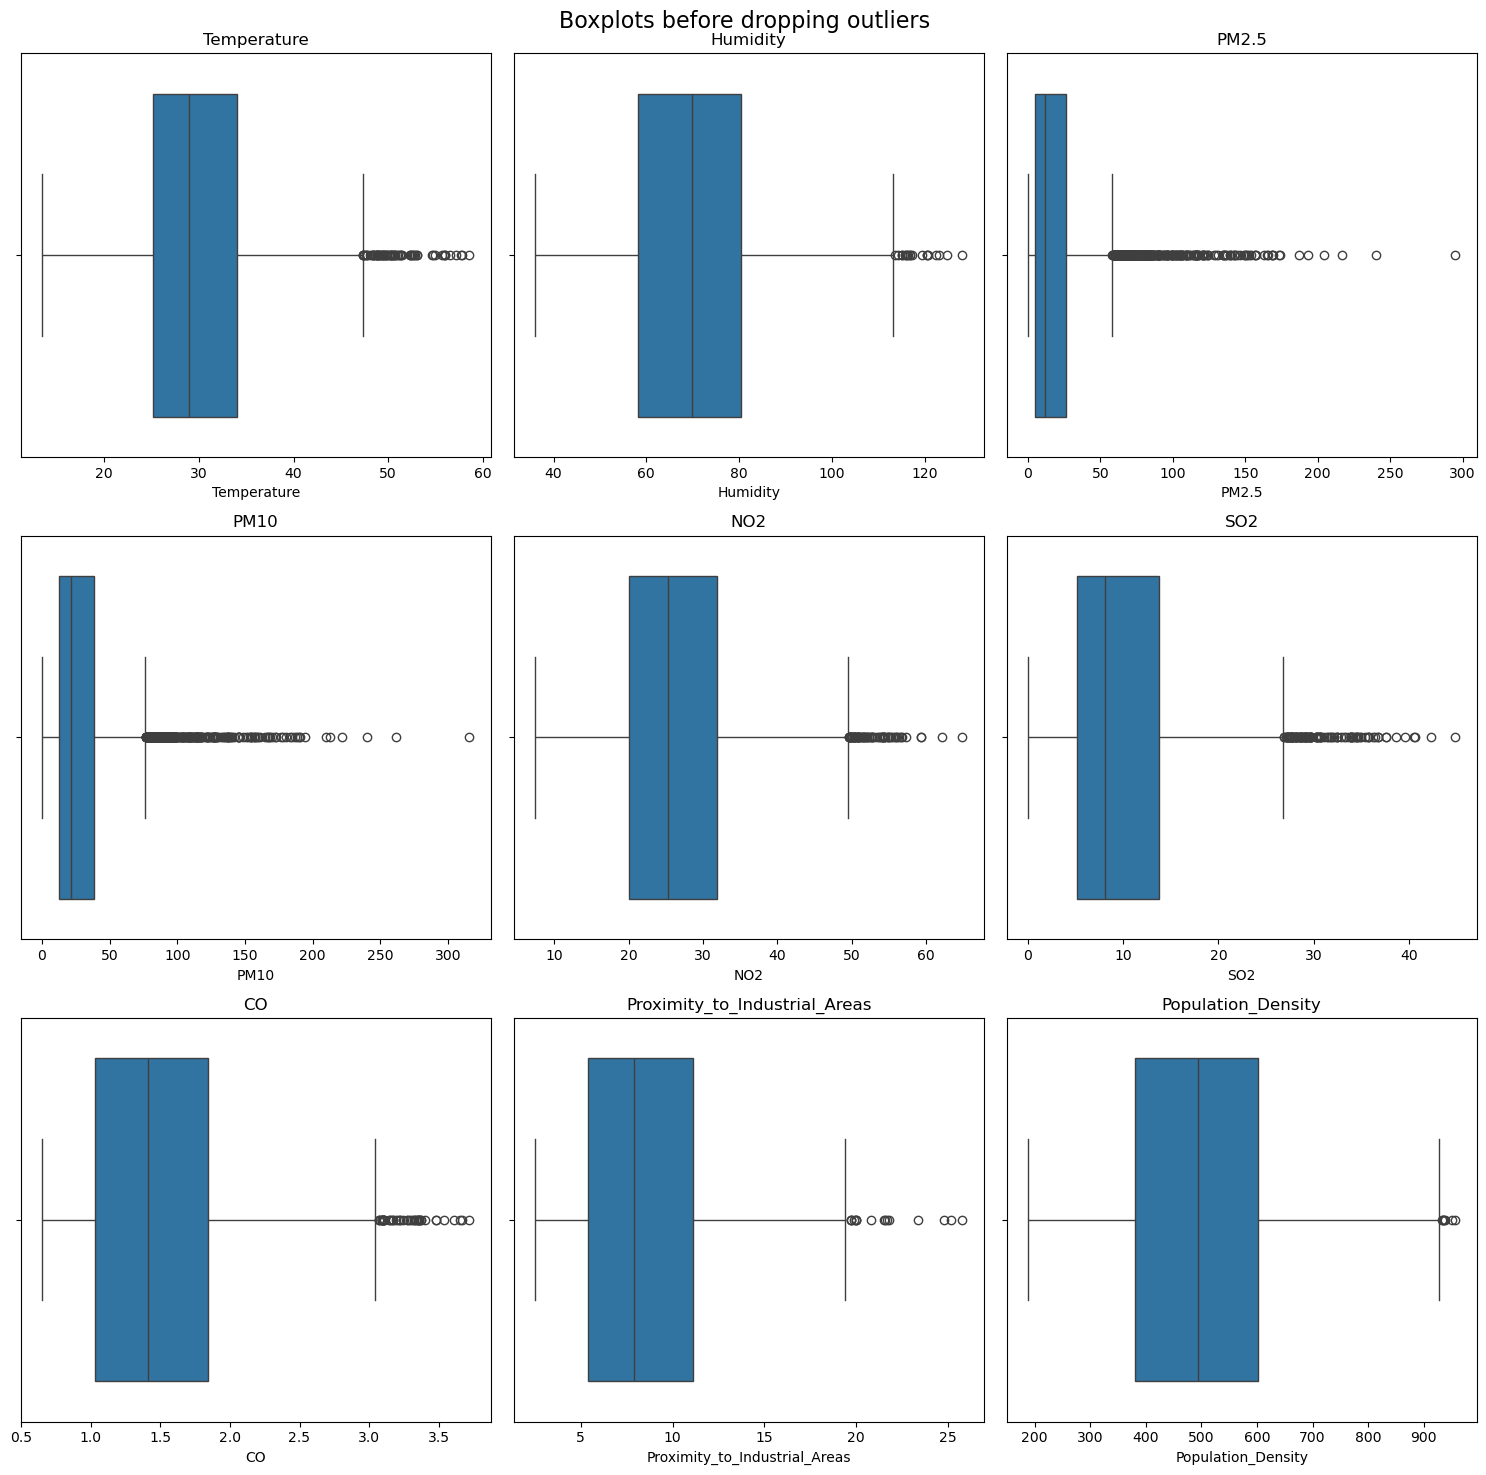

In [6]:
plt.figure(figsize=(15, 15))

plt.subplot(3,3,1)
sns.boxplot(data=df, x='Temperature')
plt.title("Temperature")

plt.subplot(3,3,2)
sns.boxplot(data=df, x='Humidity')
plt.title("Humidity")

plt.subplot(3,3,3)
sns.boxplot(data=df, x='PM2.5')
plt.title("PM2.5")

plt.subplot(3,3,4)
sns.boxplot(data=df, x='PM10')
plt.title("PM10")

plt.subplot(3,3,5)
sns.boxplot(data=df, x='NO2')
plt.title("NO2")

plt.subplot(3,3,6)
sns.boxplot(data=df, x='SO2')
plt.title("SO2")

plt.subplot(3,3,7)
sns.boxplot(data=df, x='CO')
plt.title("CO")

plt.subplot(3,3,8)
sns.boxplot(data=df, x='Proximity_to_Industrial_Areas')
plt.title("Proximity_to_Industrial_Areas")

plt.subplot(3,3,9)
sns.boxplot(data=df, x='Population_Density')
plt.title("Population_Density")

plt.suptitle("Boxplots before dropping outliers", fontsize=16)
plt.tight_layout()
plt.show()

Here we can see that there are many outliers over all the columns. So we will drop the outliers using the IQR rule

In [7]:
def remove_outliers(df, columns):
    outlier_counts = {}
    outlier_indices = set()  


    for i, col in enumerate(columns):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + (1.5 * IQR)
        
        # Find outlier indices for the column
        column_outliers = df[df[col] > upper_bound].index
        outlier_counts[col] = len(column_outliers)
        outlier_indices.update(column_outliers)
        


    # Remove all outliers from the DataFrame at once
    cleaned_df = df.drop(index=list(outlier_indices))
    return cleaned_df, outlier_counts, len(outlier_indices)

columns_to_check = ['Temperature', 'Humidity', 'PM10', 'PM2.5', 'CO', 'NO2', 'SO2', 'Proximity_to_Industrial_Areas', 'Population_Density']
cleaned_df, outliers, total_outliers = remove_outliers(df, columns_to_check)

print("Outlier counts for each column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")

print(f"\nTotal unique rows dropped: {total_outliers}")
print(f"Remaining rows: {cleaned_df.shape[0]}")


Outlier counts for each column:
Temperature: 72 outliers
Humidity: 19 outliers
PM10: 323 outliers
PM2.5: 350 outliers
CO: 45 outliers
NO2: 73 outliers
SO2: 117 outliers
Proximity_to_Industrial_Areas: 16 outliers
Population_Density: 7 outliers

Total unique rows dropped: 585
Remaining rows: 4384


Plotting the boxplot after dropping outlier rows

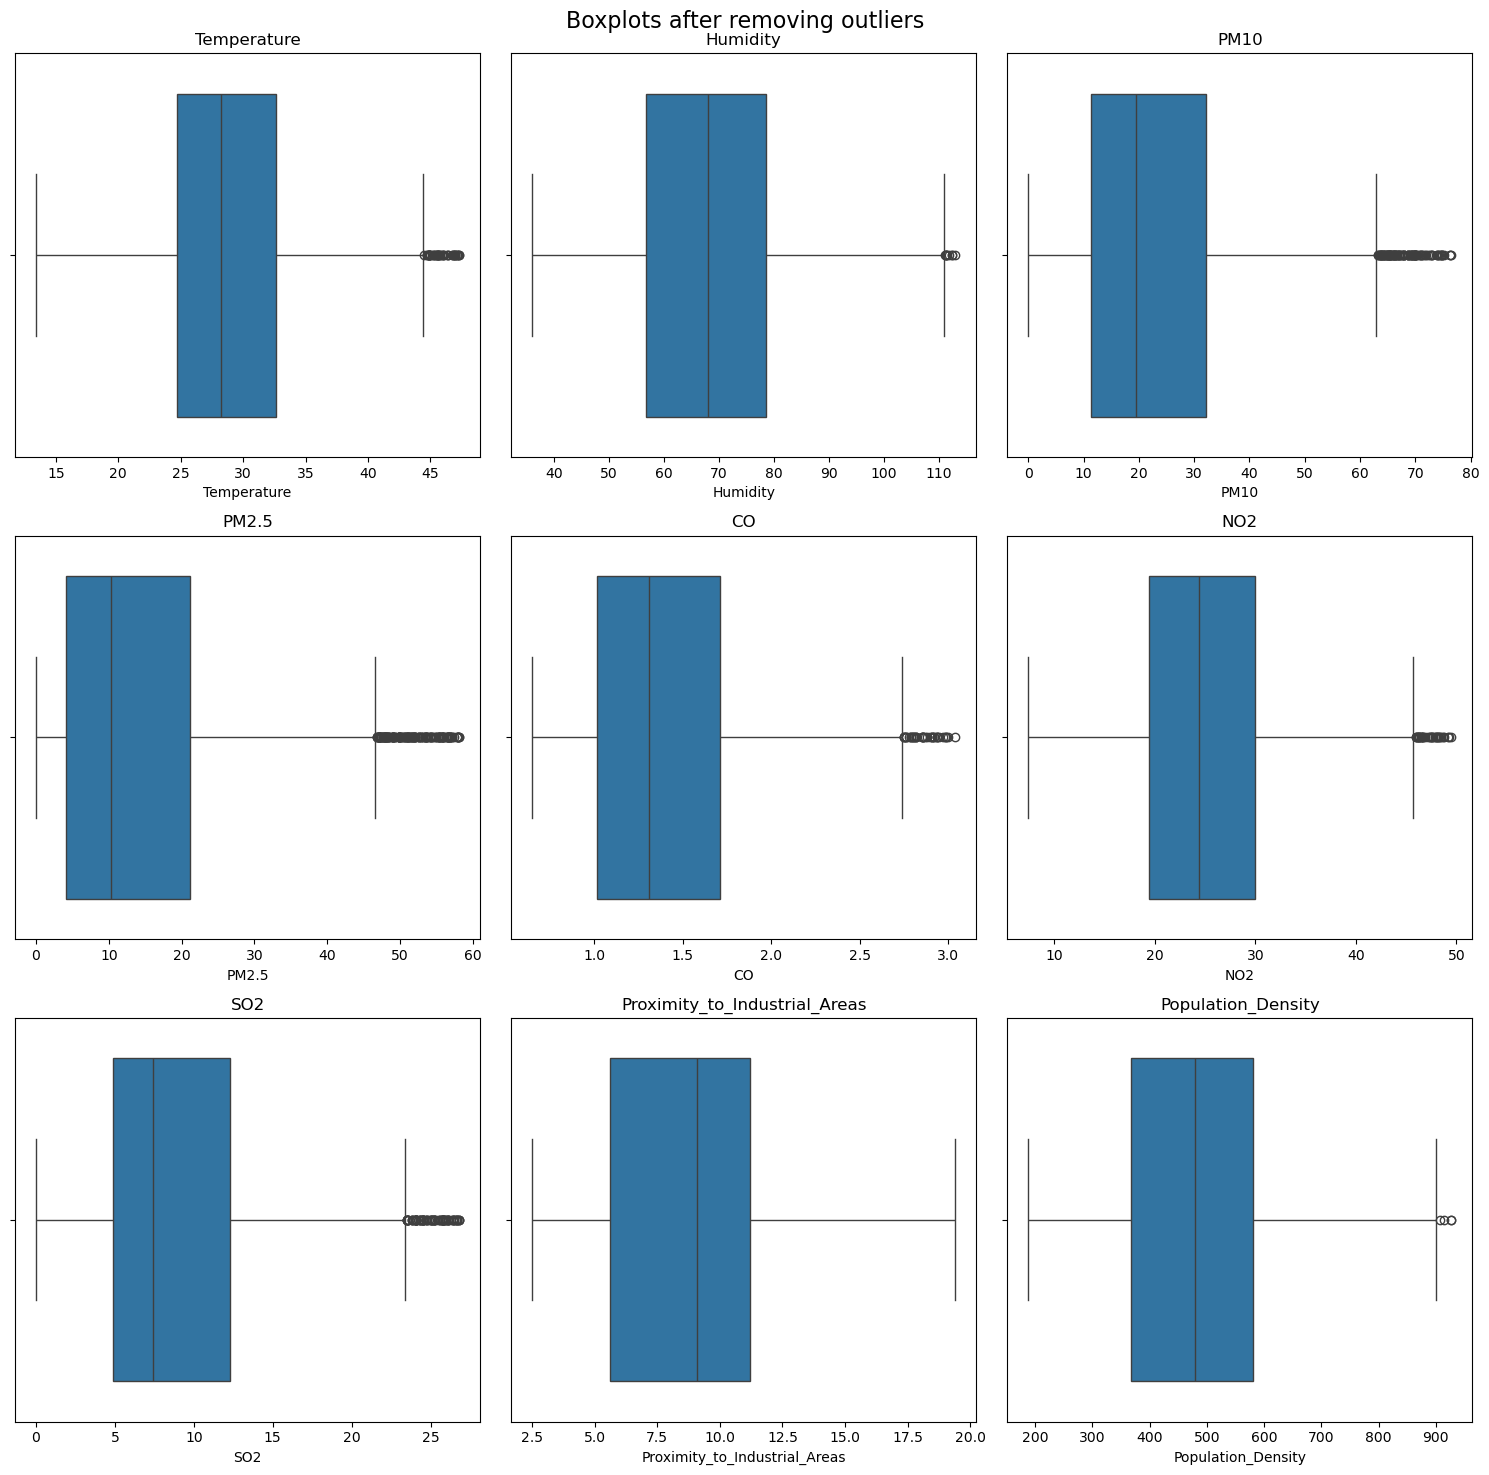

In [8]:
columns= ['Temperature', 'Humidity', 'PM10', 'PM2.5', 'CO', 'NO2', 'SO2', 'Proximity_to_Industrial_Areas', 'Population_Density']
rows, cols = 3, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(columns):
    sns.boxplot(data=cleaned_df, x=col, ax=axes[i])
    axes[i].set_title(f'{col}')
for j in range(len(columns), len(axes)):
        axes[j].axis('off')
fig.suptitle("Boxplots after removing outliers", fontsize=16)
plt.tight_layout()
plt.show()
    

<i>Even after dropping approximately 12% of the total records as outliers, some still remain just outside the upper bound. However, this can be neglected since most modern algorithms are not significantly affected by outliers, as long as they are not far from the data range. Additionally, we have already removed a considerable number of outliers, and further reductions may result in an overly small dataset. </i>

In [9]:
print(cleaned_df.shape)  
df=cleaned_df

(4384, 10)


Now we plot the correlation matrix of the dataset.

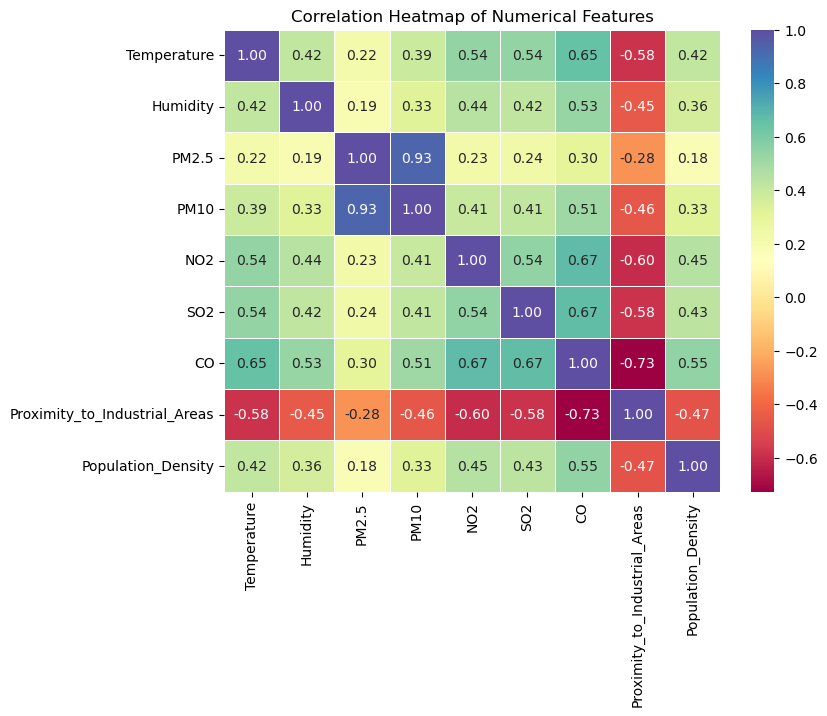

In [10]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix=numerical_columns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f", linewidths=0.5)


plt.title("Correlation Heatmap of Numerical Features")
plt.show()

There are not much noticeable correlation between any columns except for the PM 2.5 and PM10 concentrations. Also we can also observe that the column Proximity_to_Industrial_Areas have a negative correlation with all of the column. This is because, as the distance increases, the concentration of pollutants decreases. So these observations are justifiable.

---

Now we begin Machine Learning

Splitting the features and target variables

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

# print(x)
# print(y)

Encoding the target variable as it is the only categorical variable

In [12]:
lab_enc=LabelEncoder()
y=lab_enc.fit_transform(y)
print(y)

# After encoding, the numerical values for each of the categories are:
# 0-Good
# 1-Hazardous
# 2-Moderate
# 3-Poor

[2 2 2 ... 2 2 0]


Splitting the training and testing data

In [13]:
x_test, x_train, y_test, y_train= train_test_split(
    x, y, random_state=0, test_size=0.2
)

Scaling the values of x for the algorithms that required scaled x values

In [14]:
ss_x = StandardScaler()
scaled_x_train = ss_x.fit_transform(x_train)
scaled_x_test = ss_x.transform(x_test)

Now we take each of the algorithms, and we do hyperparameter tuning to get the best parameters for the given dataset. We are using Grid Search for this purpose.

1.<strong> Decision Tree Classifier </strong>

In [15]:
dtc=DecisionTreeClassifier()
param_dtc = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': [None, 'sqrt', 'log2'],  
    'splitter': ['best', 'random'],  
}

gridCLF=GridSearchCV(dtc, param_dtc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(x_train, y_train)
# print(gridCLF.best_params_)


# Hyperparameters after tuning:
# {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}

2. <strong> Random Forest Classifier </strong>

In [16]:
rfc = RandomForestClassifier()


param_rfc = {
    'n_estimators': [100, 200],  
    'max_depth': [None, 10, 20], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['sqrt', 'log2', None], 
    'bootstrap': [True, False], 
    'criterion': ['gini', 'entropy'],
}


gridCLF = GridSearchCV(rfc, param_rfc, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(x_train, y_train)
# print( gridCLF.best_params_)


# Hyperparameters after tuning:
#  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

3. <strong>KNN Classifier </strong>

In [17]:
knn = KNeighborsClassifier()


param_knn = {
    'n_neighbors': [3, 5, 7, 10, 15],  
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean', 'manhattan', 'minkowski'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'leaf_size': [10, 20, 30, 40] 
}


gridCLF = GridSearchCV(knn, param_knn, scoring='accuracy', cv=5, n_jobs=-1)
# gridCLF.fit(scaled_x_train, y_train)


# print( gridCLF.best_params_)
#  {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

4. <strong> SVM Classifier </strong>

In [18]:
svc = SVC()


param_svc = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Specifies the kernel type to be used
    'degree': [3, 4, 5],  # Degree of the polynomial kernel function (used when kernel='poly')
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'class_weight': [None, 'balanced']  # Handles class imbalance if necessary
}


gridCLF = GridSearchCV(svc, param_svc, scoring='accuracy', cv=5, n_jobs=-1)
gridCLF.fit(scaled_x_train, y_train)


print(gridCLF.best_params_)

#  {'C': 1, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}

{'C': 1, 'class_weight': None, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}


5. <strong>Gaussian Naive-Bayesian Classifier </strong>

In [19]:
gnb = GaussianNB()


param_gnb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5] 
}


gridCLF = GridSearchCV(gnb, param_gnb, scoring='accuracy', cv=5, n_jobs=-1)
gridCLF.fit(scaled_x_train, y_train)

print( gridCLF.best_params_)
#  {'var_smoothing': 1e-09}

{'var_smoothing': 1e-09}


Now we create a function to return the accuracy measures and error metrics after training the algorithm. We also create a dictionary for referencing each algorithms

In [20]:
def model_evaluation(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    accuuracy = metrics.accuracy_score(y_test, y_pred)
    mae = metrics.mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    
    return accuuracy, mae, rmse


models = {
    "Decision Tree Classifier": DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_features= None, min_samples_leaf= 1, min_samples_split= 10, splitter= 'best'),
    "Random Forest Classifier": RandomForestClassifier(bootstrap= True, criterion= 'gini', max_depth= 20, max_features= 'sqrt', min_samples_leaf= 1, min_samples_split= 5, n_estimators= 200),
    "KNN Classifier": KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, metric= 'manhattan', n_neighbors= 3, weights= 'distance'),
    "SVC Classifier": SVC(C= 1, class_weight= None, degree= 3, gamma= 'scale', kernel= 'linear'),
    "Gaussian Naive-Bayesian Classifier": GaussianNB(var_smoothing= 1e-09)
}
    


Now we call the above created function, and change up the x data according to the algorithm used. Also the results of the evaluation is stored into the results_df.

In [21]:
results = []


for model_name, model in models.items():
    if model_name == "KNN Classifier" or model_name == "SVC Classifier":
        accuracy, mae, rmse = model_evaluation(model, scaled_x_train, scaled_x_test, y_train, y_test)
    else:
        accuracy, mae, rmse = model_evaluation(model, x_train, x_test, y_train, y_test)
    
    results.append({
        "Model": model_name,
        "Accuracy Score": accuracy,
        "Mean Absolute Error": mae,
        "Root Mean Squared Error": rmse
    })


results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

                             Model  Accuracy Score  Mean Absolute Error  Root Mean Squared Error
          Decision Tree Classifier        0.911605             0.126604                 0.450580
          Random Forest Classifier        0.952096             0.071856                 0.346064
                    KNN Classifier        0.921585             0.114058                 0.430516
                    SVC Classifier        0.947248             0.077844                 0.357812
Gaussian Naive-Bayesian Classifier        0.940405             0.088680                 0.383209


Visualizing the results (Accuracy Score, Root Mean Squared Error and Mean Absolute Error)

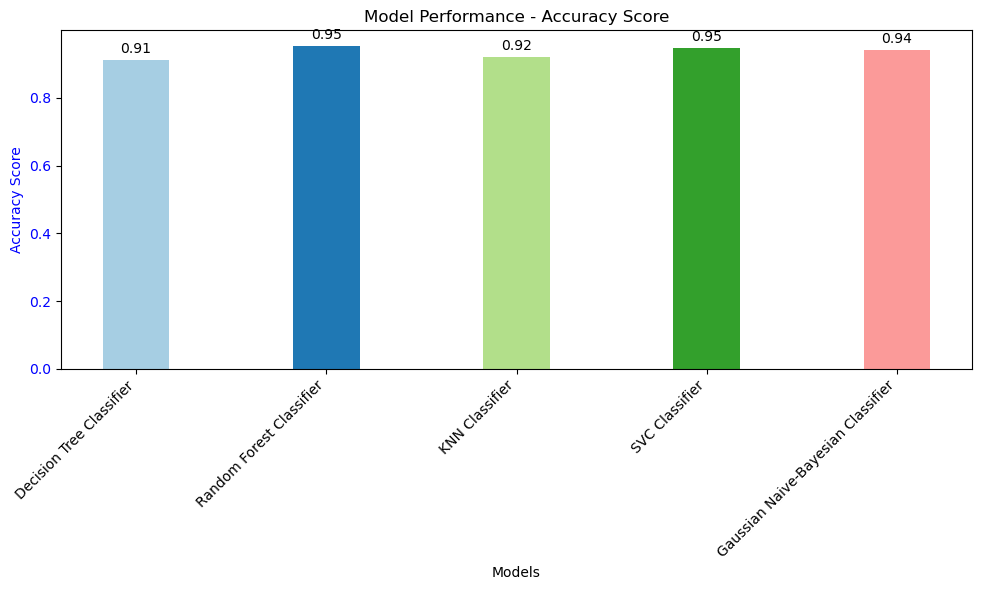

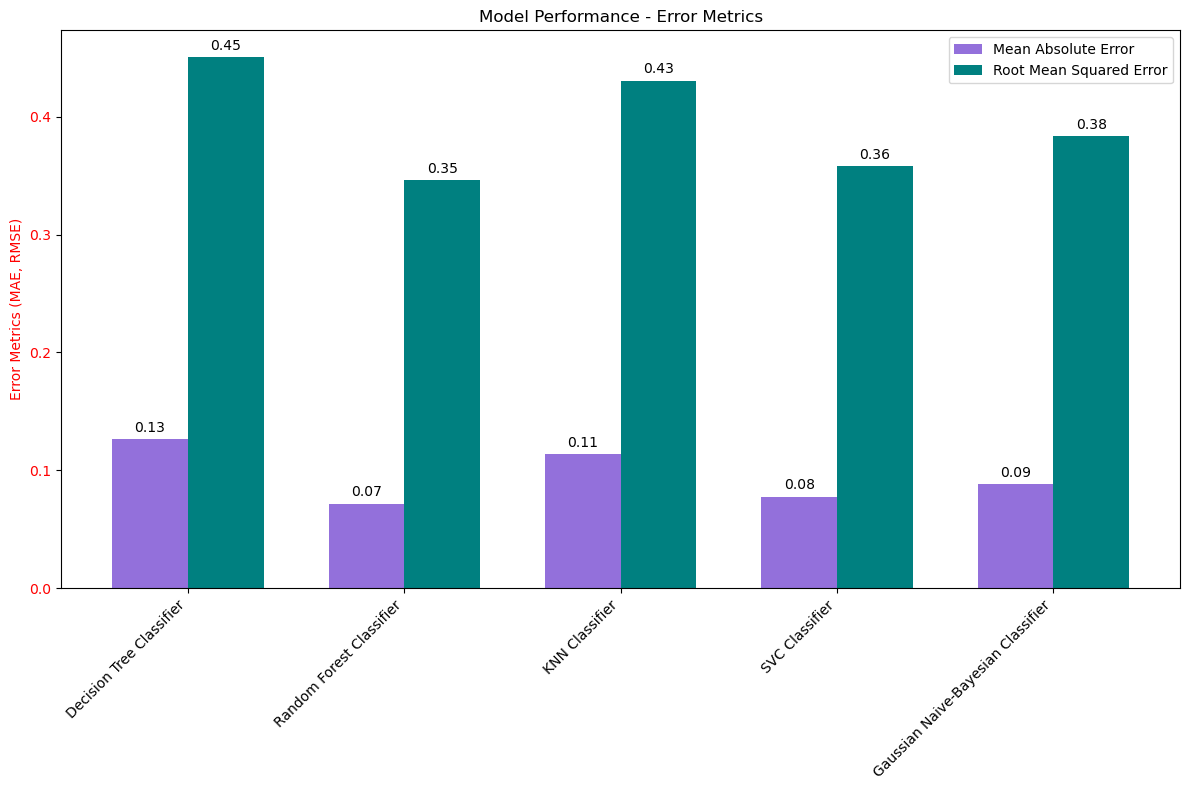

In [22]:
model_names = results_df['Model'] 
accuracy_values = results_df['Accuracy Score']
mae_values = results_df['Mean Absolute Error']
rmse_values = results_df['Root Mean Squared Error']

x = np.arange(len(model_names))  
width = 0.35  

fig, ax1 = plt.subplots(figsize=(10, 6))
bar_accuracy = ax1.bar(x, accuracy_values, width, color=plt.cm.Paired.colors[:len(model_names)], label='Accuracy Score')

ax1.set_title('Model Performance - Accuracy Score')
ax1.set_xlabel('Models')
ax1.set_ylabel('Accuracy Score', color='blue')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45, ha='right')
ax1.tick_params(axis='y', labelcolor='blue')

for bar in bar_accuracy:
    height = bar.get_height()
    ax1.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom')

plt.tight_layout()

fig, ax2 = plt.subplots(figsize=(12, 8))
bar_mae = ax2.bar(x - width / 2, mae_values, width, label='Mean Absolute Error', color='mediumpurple')
bar_rmse = ax2.bar(x + width / 2, rmse_values, width, label='Root Mean Squared Error', color='teal')

ax2.set_ylabel('Error Metrics (MAE, RMSE)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_xticks(x)
ax2.set_xticklabels(model_names, rotation=45, ha='right')
ax2.set_title('Model Performance - Error Metrics')

for bars in [bar_mae, bar_rmse]:
    for bar in bars:
        height = bar.get_height()
        ax2.annotate(f'{height:.2f}',
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom')

ax2.legend()

plt.tight_layout()
plt.show()


From the above results, we can observe that Random Forest Classification and Support Vector Classifier has the best accuracy score of 95%. But Random Forest has the lower error metrics. Hence we choose Random Forest for the building the classifier model.

Creating a custom input and classifying the output

In [23]:
temperature=29.8
humidity=59.1
pm2_5=5.2
pm1_0=17.9
no_2=18.9
so_2=9.2
c_o=1.72
proximity=6.3
population_density=319
x_custom=np.array([[temperature ,humidity ,pm2_5 ,pm1_0 ,no_2 ,so_2 ,c_o ,proximity, population_density]], dtype=object)
y_custom=models['Random Forest Classifier'].predict(x_custom)
print("Custom input prediction:",y_custom[0])



Custom input prediction: 2


We get the output in numerical datatype. So we convert it into it's categorical value.

In [24]:
air_quality_index={
    0: 'Good',
    1: 'Hazardous',
    2: 'Moderate',
    3: 'Poor'
}

y_custom_value=air_quality_index[y_custom[0]]
print("For the given parameters, the predicted Air Quality is:", y_custom_value)

For the given parameters, the predicted Air Quality is: Moderate


Now we create a function that is used to input the values of x from the user. We also create another function that validates the input recieved from the user, whether it belongs in the range of the variable, and we also include an escape character 'Q' for stopping execution.

In [25]:

def get_input(prompt, min_val, max_val):
    while True:
        user_input = input(prompt).strip()  

        if user_input.lower() == 'q': 
            print("Loop Terminated!")
            raise SystemExit

        try:
            val = float(user_input)  
            if min_val <= val <= max_val:
                return val
            else:
                print(f"Please enter a value inside the given range: {min_val}-{max_val}!")
        except ValueError:
            print("Invalid input! Please enter a numeric value or 'Q' to quit.")

def get_user_inputs():
    temp = get_input("Enter the temperature (Range: 13-48 °C) or 'Q' to quit: ", 13, 48)
    humid = get_input("Enter the humidity (Range: 36-113 %) or 'Q' to quit: ", 36, 113)
    pm25 = get_input("Enter the PM 2.5 concentration level (Range: 0-58.1 µg/m³) or 'Q' to quit: ", 0, 58.1)
    pm10 = get_input("Enter the PM 10 concentration level (Range: 0-77 µg/m³) or 'Q' to quit: ", 0, 77)
    no2 = get_input("Enter the NO2 concentration level (Range: 7.4-50 ppb) or 'Q' to quit: ", 7.4, 50)
    so2 = get_input("Enter the SO2 concentration level (Range: 0-27 ppb) or 'Q' to quit: ", 0, 27)
    co = get_input("Enter the CO concentration level (Range: 0.65-3.05 ppm) or 'Q' to quit: ", 0.65, 3.05)
    proxy = get_input("Enter the proximity of location to industrial areas (Range: 2.5-19.5 km) or 'Q' to quit: ", 2.5, 19.5)
    pop_density = get_input("Enter the population density of the location (Range: 180-930 people/km²) or 'Q' to quit: ", 180, 930)

    return np.array([[temp, humid, pm25, pm10, no2, so2, co, proxy, pop_density]], dtype=object)

x_user = get_user_inputs()
cols = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
userDF = pd.DataFrame(data=x_user, columns=cols)
print("User input parameters-")
print(userDF.to_string(index=False))

y_user = models["Random Forest Classifier"].predict(x_user)
print("The Air Quality for the given input parameters is:", air_quality_index[y_user[0]])

Loop Terminated!


SystemExit: 

c:\Users\kesav\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


<h2>Conclusion </h2>
<br>
This project implemented various classification models to identify the most effective algorithm for predicting the given target variable. By evaluating performance metrics such as accuracy score and error metrics like MAE and RMSE, the project determined that the Random Forest classifier outperformed other models. As a result, Random Forest was selected as the most suitable algorithm for this dataset and was used to make predictions on both sample input data and custom user input.